# FRED Data Analysis Project
This notebook handles data retrieval, processing, and analysis for the FRED project.

# Imports

In [1]:
import os
import sys
import requests
from datetime import datetime
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
from fpdf import FPDF

# Project setup

In [2]:
# Determine the main project folder (one level above the notebooks/ folder)
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.abspath(os.path.join(notebook_dir, ".."))

# Define folders relative to the main project directory
data_dir = os.path.join(project_dir, "data")
results_dir = os.path.join(project_dir, "results")
scripts_dir = os.path.join(project_dir,"scripts")

# Add the project directory to the Python path
sys.path.insert(0, project_dir)

# Add folder to the Python path
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

if results_dir not in sys.path:
    sys.path.append(results_dir)
    
# print("Folders added to sys.path:")
# print("\n".join(sys.path))
#print(sys.path)

In [3]:
# Create folders if they don't exist
for folder in [data_dir, results_dir, scripts_dir]:
    os.makedirs(folder, exist_ok=True)

print(f"Project directory: {project_dir}")
print(f"Data directory: {data_dir}")
print(f"Results directory: {results_dir}")
print(f"Scripts directory: {scripts_dir}")


Project directory: /data/data/com.termux/files/home/projects/fred_data_project
Data directory: /data/data/com.termux/files/home/projects/fred_data_project/data
Results directory: /data/data/com.termux/files/home/projects/fred_data_project/results
Scripts directory: /data/data/com.termux/files/home/projects/fred_data_project/scripts


# Data loading

In [4]:
# Set up fred environment
import fred_config

Fred class loaded: <class 'fredapi.fred.Fred'>


In [5]:
# Fetch the FRED data for US yields

series_ids = ["DFF","DGS3MO","DGS1","DGS2", "DGS5","DGS7","DGS10"]

us_yields = fred_config.fetch_fred_data(series_ids, start_date="", frequency="")

#us_yields.rename(columns=fred_config.FRED_SERIES, inplace=True)


# Data processing

In [6]:

print(us_yields.head())  # Inspect the first few rows


             DFF  DGS3MO  DGS1  DGS2  DGS5  DGS7  DGS10
1954-07-01  1.13     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-02  1.25     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-03  1.25     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-04  1.25     NaN   NaN   NaN   NaN   NaN    NaN
1954-07-05  0.88     NaN   NaN   NaN   NaN   NaN    NaN


# Analysis

# Results and visualization

In [7]:
# Load charting config
from charting import create_chart

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DFF_chart.png


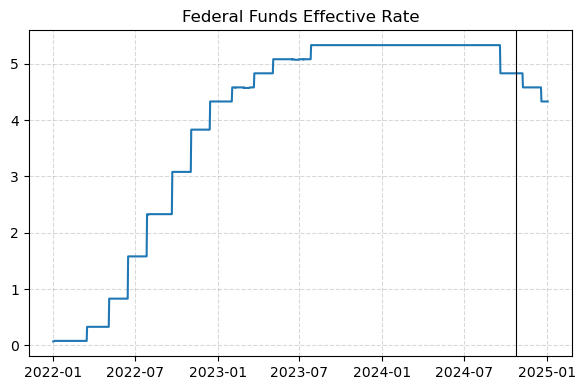

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS3MO_chart.png


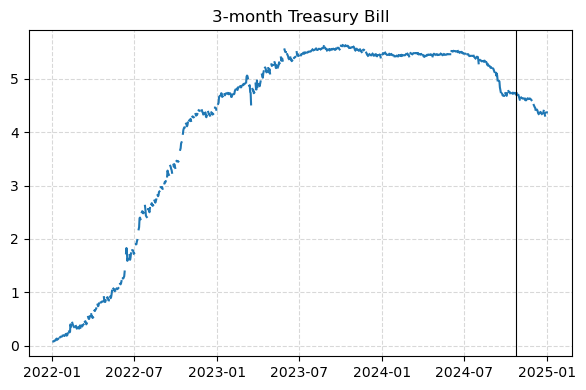

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS1_chart.png


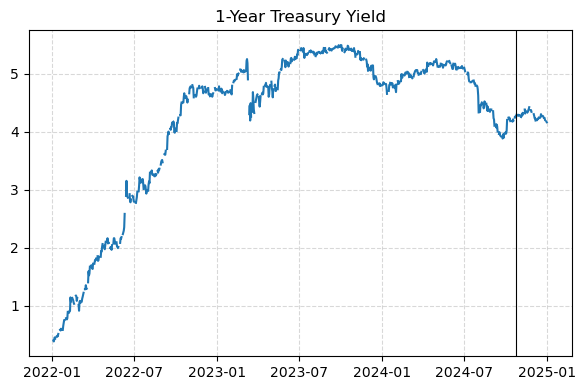

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS2_chart.png


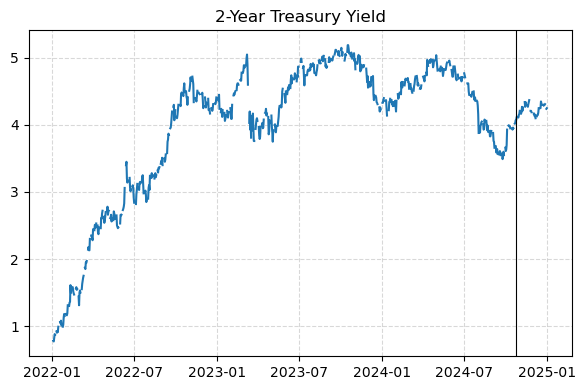

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS5_chart.png


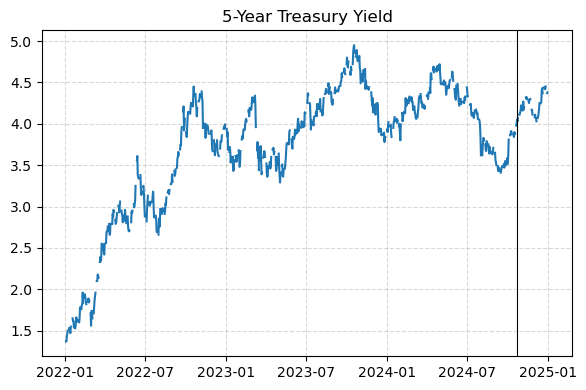

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS7_chart.png


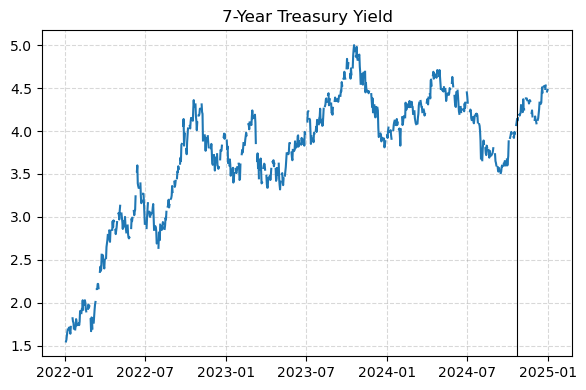

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/DGS10_chart.png


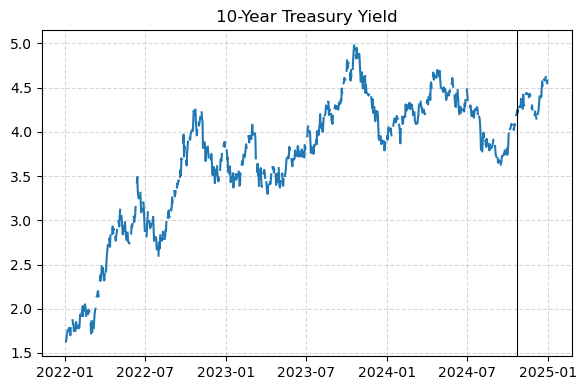

Chart saved to: /data/data/com.termux/files/home/projects/fred_data_project/results/us_yields_chart.png


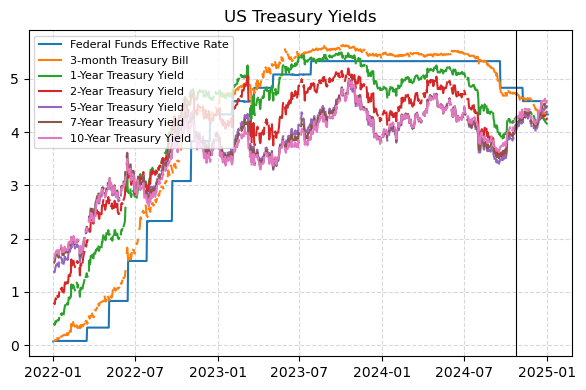

In [8]:
# US charts

# Extract column names from the DataFrame
us_yields_ids = us_yields.columns.tolist()

# Set chart parameters
vline = ["2024-10-23"]
custom_dates = ["2024-12-11", "2024-10-23","2024-09-4","2024-07-24","2024-04-10"]  # dates to include in tables
start_date = "2022-01-01"

# Loop to create individual charts for each series
for series in us_yields_ids:
    create_chart(us_yields, [series], start_date=start_date, show_data_label=False,
                 title=None, vlines=vline, show_table=False, custom_dates=custom_dates,
                 save_path=f"{results_dir}/{series}_chart.png")

# Create a single chart for the entire group
create_chart(us_yields, us_yields_ids, start_date=start_date, title="US Treasury Yields",
             show_data_label=False, vlines=vline, show_table=False, custom_dates=custom_dates,
             save_path=f"{results_dir}/us_yields_chart.png")


In [9]:
# Load tables config 

from tables import create_comparison_table
from tables import create_analysis_table

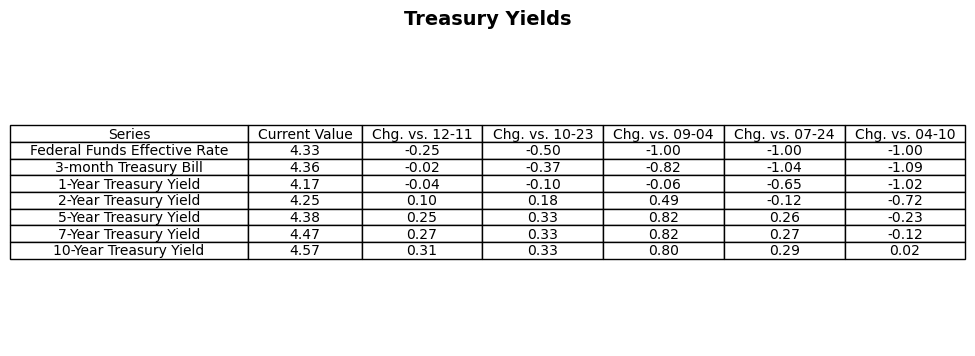

Table saved to us_yields_table.png


In [10]:

title = "Treasury Yields"
output_file = "us_yields_table.png"

create_comparison_table(us_yields, us_yields_ids, custom_dates, title, output_file)


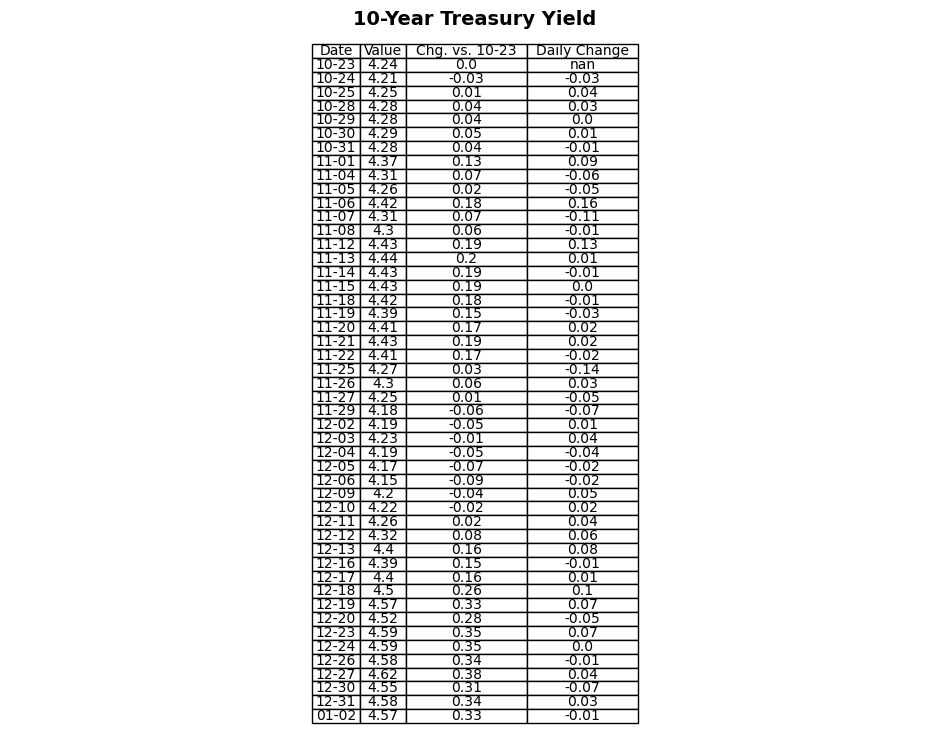

Table saved to DGS10_table.png


In [11]:
start_date = "2024-10-23"
# Generate the table
create_analysis_table("DGS10", start_date, us_yields)


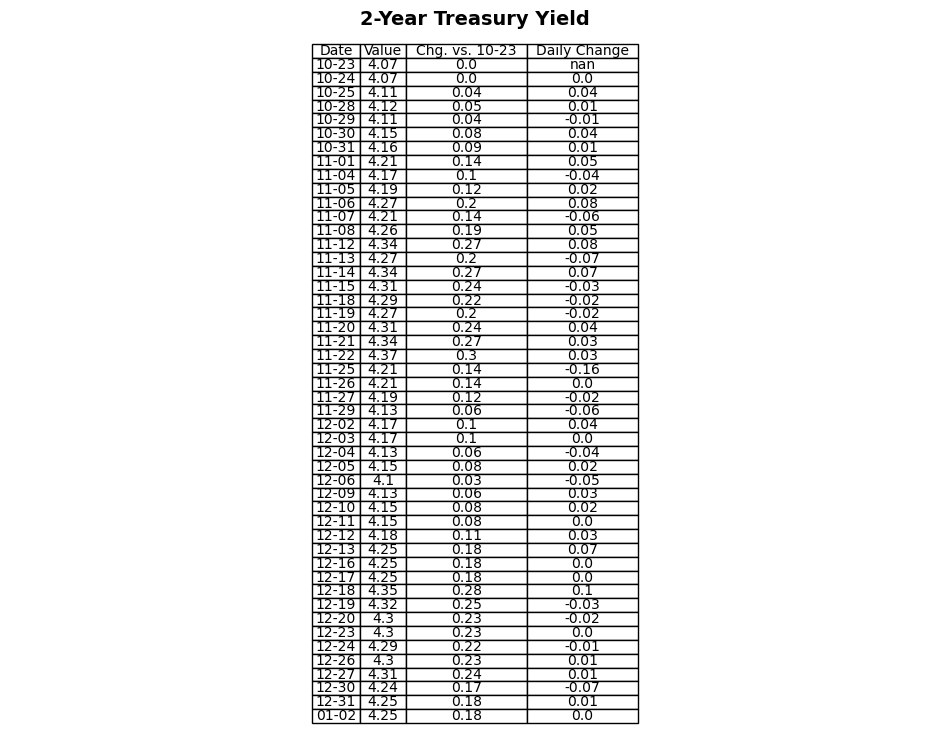

Table saved to DGS2_table.png


In [12]:
start_date = "2024-10-23"
# Generate the table
create_analysis_table("DGS2", start_date, us_yields)
